In [21]:
import pandas as pd
import numpy as np             
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

In [22]:
train_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [23]:
train_data.head()

,id,App Version Code,App Version Name,Review Text,Review Title,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,NaN,NaN,Very bad wallet balance not use.,NaN,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,NaN,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,Waste no use,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,NaN,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,NaN,5


In [25]:
test.head()

,id,App Version Code,App Version Name,Review Text,Review Title
0,bdcb3129-afc1-4608-825f-558fe9c17e2b,78.0,2.37,"Awesome app, all should use it",NaN
1,7518d5c8-5e35-45e2-b29d-cf0996ba9e2f,75.0,2.34,how can i stop notification,NaN
2,b21ca913-ba44-471b-91e1-aaf035379a84,NaN,NaN,"This app is very easy to use , nice graphics ,...",NaN
3,beaaa17d-44af-44c8-ba38-24ba54c3b17d,83.0,2.42,Quite good but felt slow response from cc. Ove...,NaN
4,89d8c4f0-6fe0-4389-b1f8-913ba894c0f1,74.0,2.33,Not getting otp for login since yesterday. Als...,NaN


### Check missing files

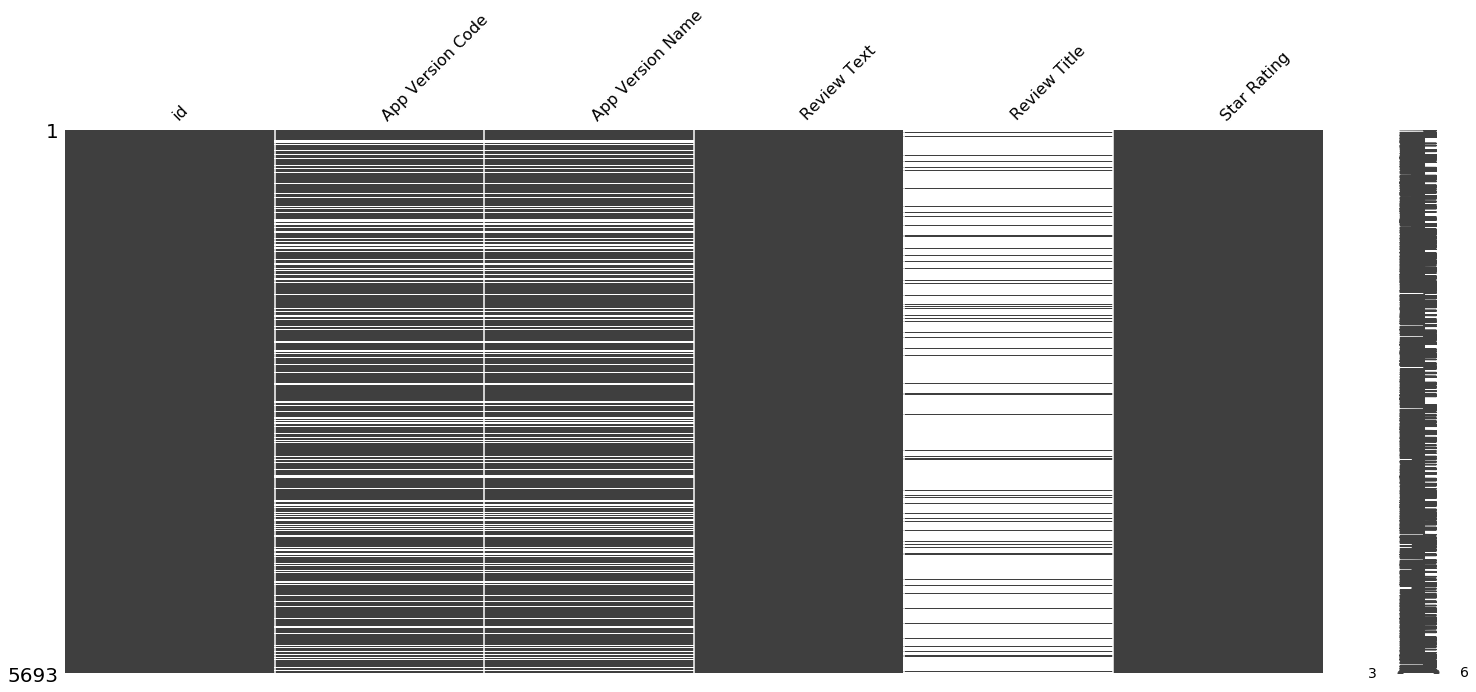

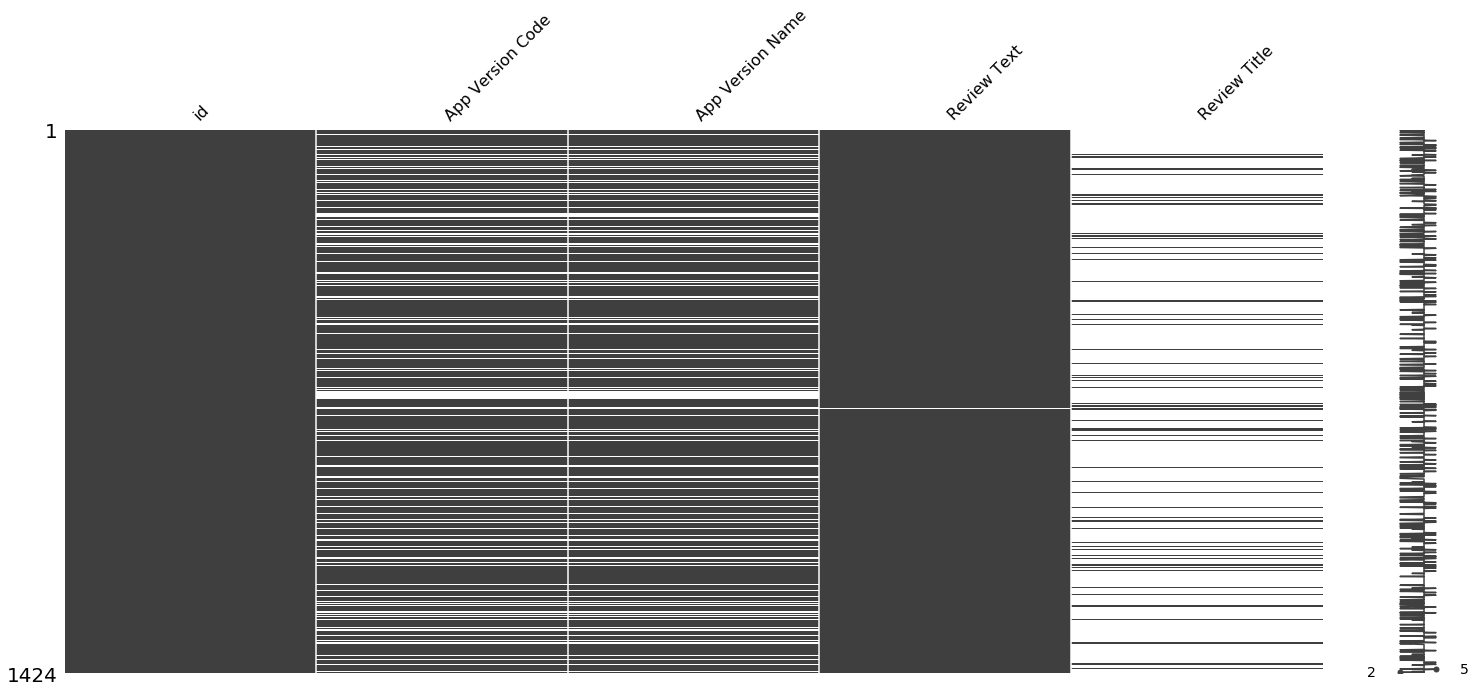

In [26]:
import missingno as msno
msno.matrix(train_data)
msno.matrix(test)


### there are lots of missing data in train set
### we use only Review text and Rating

### prepare for Training

In [27]:
data_test = test['Review Text']
x_train = train_data['Review Text']
y_train = train_data['Star Rating']

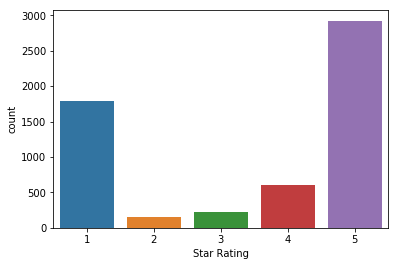

In [28]:
sns.countplot(x='Star Rating',  data = train_data )


#### By this Graph we can see max people rate 1 or 5

#### Remve stop word, and convert Upper to lower case

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()


In [30]:
from bs4 import BeautifulSoup
#global str
te = []

def review_to_words( raw_review ):
    

        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review))
    print(letters_only)
    
    # Convert to lower case, split into individual words
    words = letters_only.lower().split() 
    print(words)
    
    
    
    # Create set of stopwords
    stops = set(stopwords.words("english")) 
    #print(stops)
    
    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]  
    print(meaningful_words)
    te.append(" ".join(meaningful_words))

    
    #meaningful_word = ps.stem(meaningful_words)
    
    # Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join(meaningful_words)) 


x_train=x_train.apply(review_to_words)
data_test=data_test.apply(review_to_words)

Very bad wallet balance not use 
['very', 'bad', 'wallet', 'balance', 'not', 'use']
['bad', 'wallet', 'balance', 'use']
Froud app i recharge     but not done also send mail to niki even not replied
['froud', 'app', 'i', 'recharge', 'but', 'not', 'done', 'also', 'send', 'mail', 'to', 'niki', 'even', 'not', 'replied']
['froud', 'app', 'recharge', 'done', 'also', 'send', 'mail', 'niki', 'even', 'replied']
Waste to write comments also
['waste', 'to', 'write', 'comments', 'also']
['waste', 'write', 'comments', 'also']
Nice apo
['nice', 'apo']
['nice', 'apo']
Good nice app
['good', 'nice', 'app']
['good', 'nice', 'app']
Ghatiya app  Bill fetch nhi hota   
['ghatiya', 'app', 'bill', 'fetch', 'nhi', 'hota']
['ghatiya', 'app', 'bill', 'fetch', 'nhi', 'hota']
They showed recharge successful but I didn t got
['they', 'showed', 'recharge', 'successful', 'but', 'i', 'didn', 't', 'got']
['showed', 'recharge', 'successful', 'got']
This is good app for recharge and electric bill payment
['this', 'is',

['bill', 'ca', 'number', 'still', 'arrears', 'bill', 'paid', 'sept', 'kindly', 'call', 'back']
Worst one  I recharge rs     from Niki through phonpe offer     cashback recharge completed IAM not receiving any cash back
['worst', 'one', 'i', 'recharge', 'rs', 'from', 'niki', 'through', 'phonpe', 'offer', 'cashback', 'recharge', 'completed', 'iam', 'not', 'receiving', 'any', 'cash', 'back']
['worst', 'one', 'recharge', 'rs', 'niki', 'phonpe', 'offer', 'cashback', 'recharge', 'completed', 'iam', 'receiving', 'cash', 'back']
Have thisvapp
['have', 'thisvapp']
['thisvapp']
Fix it ASAP
['fix', 'it', 'asap']
['fix', 'asap']
money deducted for a failed order 
['money', 'deducted', 'for', 'a', 'failed', 'order']
['money', 'deducted', 'failed', 'order']
Superb app use se pahle laga kya bakwash app hai per pahli bar esse postpad no ka bill diya to pata chala it s smpl use and best epaylater ke sath to superb work
['superb', 'app', 'use', 'se', 'pahle', 'laga', 'kya', 'bakwash', 'app', 'hai', 'per

['booked', 'ticket', 'ticket', 'booked', 'amount', 'deducted', 'account', 'times', 'please', 'suggest']
Awesome
['awesome']
['awesome']
Best offer
['best', 'offer']
['best', 'offer']
This is a promising app but sadly it just doesn t get the job done most of the time It s more fancy than useful  
['this', 'is', 'a', 'promising', 'app', 'but', 'sadly', 'it', 'just', 'doesn', 't', 'get', 'the', 'job', 'done', 'most', 'of', 'the', 'time', 'it', 's', 'more', 'fancy', 'than', 'useful']
['promising', 'app', 'sadly', 'get', 'job', 'done', 'time', 'fancy', 'useful']
non sense niki
['non', 'sense', 'niki']
['non', 'sense', 'niki']
These third party apps are not worthy enough  Charging extra as a convenience charges  Are you not earning on recharges done 
['these', 'third', 'party', 'apps', 'are', 'not', 'worthy', 'enough', 'charging', 'extra', 'as', 'a', 'convenience', 'charges', 'are', 'you', 'not', 'earning', 'on', 'recharges', 'done']
['third', 'party', 'apps', 'worthy', 'enough', 'charging',

['fake', 'app']
Super
['super']
['super']
Kdk app hai bhai cool nice Lovely     
['kdk', 'app', 'hai', 'bhai', 'cool', 'nice', 'lovely']
['kdk', 'app', 'hai', 'bhai', 'cool', 'nice', 'lovely']
poor   one of the porest apps I have seen
['poor', 'one', 'of', 'the', 'porest', 'apps', 'i', 'have', 'seen']
['poor', 'one', 'porest', 'apps', 'seen']
Goof
['goof']
['goof']
Recharge failed but refund not back
['recharge', 'failed', 'but', 'refund', 'not', 'back']
['recharge', 'failed', 'refund', 'back']
nyc app for all purpose
['nyc', 'app', 'for', 'all', 'purpose']
['nyc', 'app', 'purpose']
Awesome app for first and secure bill payment
['awesome', 'app', 'for', 'first', 'and', 'secure', 'bill', 'payment']
['awesome', 'app', 'first', 'secure', 'bill', 'payment']
Fuck this app I have   rs  In my Niki wallet I want to redeem  But the robot only suggest me not recharge my no 
['fuck', 'this', 'app', 'i', 'have', 'rs', 'in', 'my', 'niki', 'wallet', 'i', 'want', 'to', 'redeem', 'but', 'the', 'robot'

['user', 'friendly']
Showing error msg unable to validate otp  Wtf 
['showing', 'error', 'msg', 'unable', 'to', 'validate', 'otp', 'wtf']
['showing', 'error', 'msg', 'unable', 'validate', 'otp', 'wtf']
Nice and easy to use   
['nice', 'and', 'easy', 'to', 'use']
['nice', 'easy', 'use']
Nice app  Plz change the system that we can use only     to      wallet balance
['nice', 'app', 'plz', 'change', 'the', 'system', 'that', 'we', 'can', 'use', 'only', 'to', 'wallet', 'balance']
['nice', 'app', 'plz', 'change', 'system', 'use', 'wallet', 'balance']
Jhakaas
['jhakaas']
['jhakaas']
aswm app
['aswm', 'app']
['aswm', 'app']
How can I redeem referral earned amount
['how', 'can', 'i', 'redeem', 'referral', 'earned', 'amount']
['redeem', 'referral', 'earned', 'amount']
Where is redeem option
['where', 'is', 'redeem', 'option']
['redeem', 'option']
Customer service pathetic  Does not gets the cashback as mentioned for Amazon pay  Complains goes to the deaf ears 
['customer', 'service', 'pathetic',

['best', 'ola', 'cab', 'booking', 'app']
App freezes while transacting  Very slow too 
['app', 'freezes', 'while', 'transacting', 'very', 'slow', 'too']
['app', 'freezes', 'transacting', 'slow']
Found it very very useful    Cab Booking cannot be done faster and quicker as Niki  Waiting for more awsome feature    
['found', 'it', 'very', 'very', 'useful', 'cab', 'booking', 'cannot', 'be', 'done', 'faster', 'and', 'quicker', 'as', 'niki', 'waiting', 'for', 'more', 'awsome', 'feature']
['found', 'useful', 'cab', 'booking', 'cannot', 'done', 'faster', 'quicker', 'niki', 'waiting', 'awsome', 'feature']
If you want to free    rs on app use refferal code arjun  
['if', 'you', 'want', 'to', 'free', 'rs', 'on', 'app', 'use', 'refferal', 'code', 'arjun']
['want', 'free', 'rs', 'app', 'use', 'refferal', 'code', 'arjun']
I love the App  too fast n very Good deal for the cashback    Also good Customer Support  replying the Doubt within few minutes 
['i', 'love', 'the', 'app', 'too', 'fast', 'n', 'v

['nan']
Great app but customer service is little late
['great', 'app', 'but', 'customer', 'service', 'is', 'little', 'late']
['great', 'app', 'customer', 'service', 'little', 'late']
nice app
['nice', 'app']
['nice', 'app']
Waste no response for my issue regarding drop the price contest don t try this app more than four days till now no response from customer support
['waste', 'no', 'response', 'for', 'my', 'issue', 'regarding', 'drop', 'the', 'price', 'contest', 'don', 't', 'try', 'this', 'app', 'more', 'than', 'four', 'days', 'till', 'now', 'no', 'response', 'from', 'customer', 'support']
['waste', 'response', 'issue', 'regarding', 'drop', 'price', 'contest', 'try', 'app', 'four', 'days', 'till', 'response', 'customer', 'support']
Did receive paypal vash back on this app as promised
['did', 'receive', 'paypal', 'vash', 'back', 'on', 'this', 'app', 'as', 'promised']
['receive', 'paypal', 'vash', 'back', 'app', 'promised']
The automated system is senseless and there is no way to connec

['nice', 'app']
Great
['great']
['great']
I love
['i', 'love']
['love']
Awesome app
['awesome', 'app']
['awesome', 'app']
I made online payment for mobile recharger   offer was     cashback but neither cashback is given nor recharger is been done  but money is been deducted from my bank a c   transcation is blank my order is blank   please do figure it out
['i', 'made', 'online', 'payment', 'for', 'mobile', 'recharger', 'offer', 'was', 'cashback', 'but', 'neither', 'cashback', 'is', 'given', 'nor', 'recharger', 'is', 'been', 'done', 'but', 'money', 'is', 'been', 'deducted', 'from', 'my', 'bank', 'a', 'c', 'transcation', 'is', 'blank', 'my', 'order', 'is', 'blank', 'please', 'do', 'figure', 'it', 'out']
['made', 'online', 'payment', 'mobile', 'recharger', 'offer', 'cashback', 'neither', 'cashback', 'given', 'recharger', 'done', 'money', 'deducted', 'bank', 'c', 'transcation', 'blank', 'order', 'blank', 'please', 'figure']
niki refferal code is saurav   get instant rs   
['niki', 'reffer

['niki', 'good', 'chat', 'recharge']
Over all nice app
['over', 'all', 'nice', 'app']
['nice', 'app']
By chatting they are solving all queries
['by', 'chatting', 'they', 'are', 'solving', 'all', 'queries']
['chatting', 'solving', 'queries']
very useful app for all payments  still need some improvements
['very', 'useful', 'app', 'for', 'all', 'payments', 'still', 'need', 'some', 'improvements']
['useful', 'app', 'payments', 'still', 'need', 'improvements']
Very good service of niki  ilove it go a head very good service
['very', 'good', 'service', 'of', 'niki', 'ilove', 'it', 'go', 'a', 'head', 'very', 'good', 'service']
['good', 'service', 'niki', 'ilove', 'go', 'head', 'good', 'service']
Amazing I like it
['amazing', 'i', 'like', 'it']
['amazing', 'like']
Please give me Reefer id
['please', 'give', 'me', 'reefer', 'id']
['please', 'give', 'reefer', 'id']
This is a very swift and intelligent app  Lets you get rid of cab booking and mobile recharge apps  Just let the personal assistant k

['bad', 'app']
Really very helpful app
['really', 'very', 'helpful', 'app']
['really', 'helpful', 'app']
I successfully recharged my mobile but not get referral bonus
['i', 'successfully', 'recharged', 'my', 'mobile', 'but', 'not', 'get', 'referral', 'bonus']
['successfully', 'recharged', 'mobile', 'get', 'referral', 'bonus']
Awesome app awesome cash back
['awesome', 'app', 'awesome', 'cash', 'back']
['awesome', 'app', 'awesome', 'cash', 'back']
Good app but recharge confirmation is too slow  no one waits that much for confirmation 
['good', 'app', 'but', 'recharge', 'confirmation', 'is', 'too', 'slow', 'no', 'one', 'waits', 'that', 'much', 'for', 'confirmation']
['good', 'app', 'recharge', 'confirmation', 'slow', 'one', 'waits', 'much', 'confirmation']
No offers other than first time offers
['no', 'offers', 'other', 'than', 'first', 'time', 'offers']
['offers', 'first', 'time', 'offers']
all in one   easy to use  lightweight superfast   excellent in providing seamless services in ever

['lost', 'rs', 'trying', 'recharge', 'tried', 'contacting', 'support', 'responsive', 'dont', 'try', 'try', 'alternate', 'apps', 'recharge']
I have recharged my jio no with it and it showed successful but i have not received the recharge even i have checked in my jio app worst app ever and their customer service is woeful they will not respond to you or refund ur balance
['i', 'have', 'recharged', 'my', 'jio', 'no', 'with', 'it', 'and', 'it', 'showed', 'successful', 'but', 'i', 'have', 'not', 'received', 'the', 'recharge', 'even', 'i', 'have', 'checked', 'in', 'my', 'jio', 'app', 'worst', 'app', 'ever', 'and', 'their', 'customer', 'service', 'is', 'woeful', 'they', 'will', 'not', 'respond', 'to', 'you', 'or', 'refund', 'ur', 'balance']
['recharged', 'jio', 'showed', 'successful', 'received', 'recharge', 'even', 'checked', 'jio', 'app', 'worst', 'app', 'ever', 'customer', 'service', 'woeful', 'respond', 'refund', 'ur', 'balance']
worst bill payment site  Tried to pay my electricity bill 

['booked', 'event', 'new', 'category', 'interesting', 'stuff']
Nice app but offers are not so good
['nice', 'app', 'but', 'offers', 'are', 'not', 'so', 'good']
['nice', 'app', 'offers', 'good']
It was a great app for me untill i was in need of their customer service  I raised my ticket on  st April on niki app and the same was mailed to them too regarding my cashback from bus operator  But even after   days no one replied to my mail or query  You peoples are dealing with common peoples money and if you can t provide customer service then better shut down your services  For me my hard earned money is not that much simple 
['it', 'was', 'a', 'great', 'app', 'for', 'me', 'untill', 'i', 'was', 'in', 'need', 'of', 'their', 'customer', 'service', 'i', 'raised', 'my', 'ticket', 'on', 'st', 'april', 'on', 'niki', 'app', 'and', 'the', 'same', 'was', 'mailed', 'to', 'them', 'too', 'regarding', 'my', 'cashback', 'from', 'bus', 'operator', 'but', 'even', 'after', 'days', 'no', 'one', 'replied', 't

['great', 'app']
Worst App Ever  Show successful recharge for the failed transaction and looted money 
['worst', 'app', 'ever', 'show', 'successful', 'recharge', 'for', 'the', 'failed', 'transaction', 'and', 'looted', 'money']
['worst', 'app', 'ever', 'show', 'successful', 'recharge', 'failed', 'transaction', 'looted', 'money']
nice
['nice']
['nice']
Good but could be better if you give offers
['good', 'but', 'could', 'be', 'better', 'if', 'you', 'give', 'offers']
['good', 'could', 'better', 'give', 'offers']
Why does the app restricate the complete use of cashback credits 
['why', 'does', 'the', 'app', 'restricate', 'the', 'complete', 'use', 'of', 'cashback', 'credits']
['app', 'restricate', 'complete', 'use', 'cashback', 'credits']
Very good app   Easy to use   So many offers    I love it    
['very', 'good', 'app', 'easy', 'to', 'use', 'so', 'many', 'offers', 'i', 'love', 'it']
['good', 'app', 'easy', 'use', 'many', 'offers', 'love']
Useless app I pay a bill throw Niki as par Niki p

['useful', 'app']
refund nahi deta hai
['refund', 'nahi', 'deta', 'hai']
['refund', 'nahi', 'deta', 'hai']
Really nice app
['really', 'nice', 'app']
['really', 'nice', 'app']
Very nice App
['very', 'nice', 'app']
['nice', 'app']
It is the one app of its kind  Great chat based AI for all services  Keep it up 
['it', 'is', 'the', 'one', 'app', 'of', 'its', 'kind', 'great', 'chat', 'based', 'ai', 'for', 'all', 'services', 'keep', 'it', 'up']
['one', 'app', 'kind', 'great', 'chat', 'based', 'ai', 'services', 'keep']
nice aap
['nice', 'aap']
['nice', 'aap']
Notification need improvement
['notification', 'need', 'improvement']
['notification', 'need', 'improvement']
Amazing how it understands human language
['amazing', 'how', 'it', 'understands', 'human', 'language']
['amazing', 'understands', 'human', 'language']
Good
['good']
['good']
Keeps crashing
['keeps', 'crashing']
['keeps', 'crashing']
Plizz give me   My mony         Plizz    fake app don t Dawnlode this app plizzz 
['plizz', 'give'

['help', 'full', 'nice', 'app']
Promo code which was entered first is applied by default  I got a new promo code by referring my friend which gives higher benefit is me is not been applied  There is also no option to remove ealier entered promo code
['promo', 'code', 'which', 'was', 'entered', 'first', 'is', 'applied', 'by', 'default', 'i', 'got', 'a', 'new', 'promo', 'code', 'by', 'referring', 'my', 'friend', 'which', 'gives', 'higher', 'benefit', 'is', 'me', 'is', 'not', 'been', 'applied', 'there', 'is', 'also', 'no', 'option', 'to', 'remove', 'ealier', 'entered', 'promo', 'code']
['promo', 'code', 'entered', 'first', 'applied', 'default', 'got', 'new', 'promo', 'code', 'referring', 'friend', 'gives', 'higher', 'benefit', 'applied', 'also', 'option', 'remove', 'ealier', 'entered', 'promo', 'code']
I like the app AI  Fast processing and work like a charm 
['i', 'like', 'the', 'app', 'ai', 'fast', 'processing', 'and', 'work', 'like', 'a', 'charm']
['like', 'app', 'ai', 'fast', 'process

['bad', 'services', 'referral', 'credit', 'comes', 'refer', 'people', 'got', 'referral', 'even', 'referred', 'person', 'got', 'credit', 'referral', 'nonsense']
Good
['good']
['good']
Very innovative application  Good one developers  keep it up 
['very', 'innovative', 'application', 'good', 'one', 'developers', 'keep', 'it', 'up']
['innovative', 'application', 'good', 'one', 'developers', 'keep']
good
['good']
['good']
very worst app   dont download
['very', 'worst', 'app', 'dont', 'download']
['worst', 'app', 'dont', 'download']
bekar
['bekar']
['bekar']
Plus   you can decide bill amount to be paid  no need to pay complete bill  Minus   small convenience fee as compared to other similar app
['plus', 'you', 'can', 'decide', 'bill', 'amount', 'to', 'be', 'paid', 'no', 'need', 'to', 'pay', 'complete', 'bill', 'minus', 'small', 'convenience', 'fee', 'as', 'compared', 'to', 'other', 'similar', 'app']
['plus', 'decide', 'bill', 'amount', 'paid', 'need', 'pay', 'complete', 'bill', 'minus', 's

['nice', 'app']
Fraudulent  Hang people by processing recharge for hours  which is an instant process  Didn t refund yet  I recharged again at FREECHARGE within seconds  Share the same at Social Networking 
['fraudulent', 'hang', 'people', 'by', 'processing', 'recharge', 'for', 'hours', 'which', 'is', 'an', 'instant', 'process', 'didn', 't', 'refund', 'yet', 'i', 'recharged', 'again', 'at', 'freecharge', 'within', 'seconds', 'share', 'the', 'same', 'at', 'social', 'networking']
['fraudulent', 'hang', 'people', 'processing', 'recharge', 'hours', 'instant', 'process', 'refund', 'yet', 'recharged', 'freecharge', 'within', 'seconds', 'share', 'social', 'networking']
Its a great app for recharge  for both prepaid and postpade recharges  Also use my refferel code debasish   when joining for instant   rs cash in ur account 
['its', 'a', 'great', 'app', 'for', 'recharge', 'for', 'both', 'prepaid', 'and', 'postpade', 'recharges', 'also', 'use', 'my', 'refferel', 'code', 'debasish', 'when', 'joi

['nice', 'customer', 'service', 'support']
simplified cab booking for ola and uber
['simplified', 'cab', 'booking', 'for', 'ola', 'and', 'uber']
['simplified', 'cab', 'booking', 'ola', 'uber']
Not cashback all recharge
['not', 'cashback', 'all', 'recharge']
['cashback', 'recharge']
This app has some issues    There is no promocode so it s depend on them that u will get benefit or not    Poor customer service  They are just writing what they want  never cares what you want    App is not working properly  u need to wait till niki will type 
['this', 'app', 'has', 'some', 'issues', 'there', 'is', 'no', 'promocode', 'so', 'it', 's', 'depend', 'on', 'them', 'that', 'u', 'will', 'get', 'benefit', 'or', 'not', 'poor', 'customer', 'service', 'they', 'are', 'just', 'writing', 'what', 'they', 'want', 'never', 'cares', 'what', 'you', 'want', 'app', 'is', 'not', 'working', 'properly', 'u', 'need', 'to', 'wait', 'till', 'niki', 'will', 'type']
['app', 'issues', 'promocode', 'depend', 'u', 'get', 'b

['cab', 'booking', 'sakath', 'bega', 'aythu', 'addu', 'kuda', 'nandu', 'g', 'itu']
awesome app
['awesome', 'app']
['awesome', 'app']
No refund received on first transaction of rs      Bad apps
['no', 'refund', 'received', 'on', 'first', 'transaction', 'of', 'rs', 'bad', 'apps']
['refund', 'received', 'first', 'transaction', 'rs', 'bad', 'apps']
excellent
['excellent']
['excellent']
Sir my two recharge was not done but the amount was debited from my account plz help
['sir', 'my', 'two', 'recharge', 'was', 'not', 'done', 'but', 'the', 'amount', 'was', 'debited', 'from', 'my', 'account', 'plz', 'help']
['sir', 'two', 'recharge', 'done', 'amount', 'debited', 'account', 'plz', 'help']
Surely it helps to serve the purpose and do introdice laundry services now
['surely', 'it', 'helps', 'to', 'serve', 'the', 'purpose', 'and', 'do', 'introdice', 'laundry', 'services', 'now']
['surely', 'helps', 'serve', 'purpose', 'introdice', 'laundry', 'services']
They started refer and earn programme i invit

['good', 'app', 'use', 'referral', 'code', 'haripada', 'get', 'rupees']
unable to signup it hangs
['unable', 'to', 'signup', 'it', 'hangs']
['unable', 'signup', 'hangs']
Best Recharge App
['best', 'recharge', 'app']
['best', 'recharge', 'app']
It s a good app to pay bills and recharges   
['it', 's', 'a', 'good', 'app', 'to', 'pay', 'bills', 'and', 'recharges']
['good', 'app', 'pay', 'bills', 'recharges']
kya isse pay krna safe rhega   din bad last date h   risk le skta hu ya nhi 
['kya', 'isse', 'pay', 'krna', 'safe', 'rhega', 'din', 'bad', 'last', 'date', 'h', 'risk', 'le', 'skta', 'hu', 'ya', 'nhi']
['kya', 'isse', 'pay', 'krna', 'safe', 'rhega', 'din', 'bad', 'last', 'date', 'h', 'risk', 'le', 'skta', 'hu', 'ya', 'nhi']
Wow  Awesome  So convenient 
['wow', 'awesome', 'so', 'convenient']
['wow', 'awesome', 'convenient']
terrible experience  they deduct your money because they say bill is failed but do not provide refund for     days minimum  they say its part of process of refund  w

['use', 'niki', 'wallet', 'credits', 'credits', 'niki', 'wallet', 'use']
By promising to provide assistance within   hours  its been    hours but no assistance provided on my ticket Id         to get your attention i am writing in this platform  Sudden policy changes makes niki big disappointment and aweful In last     days there were several issues Unable to use niki credit My elite user tag removed While others giving cashback you started charging convenience fee adding more burden on bills or recharge amount
['by', 'promising', 'to', 'provide', 'assistance', 'within', 'hours', 'its', 'been', 'hours', 'but', 'no', 'assistance', 'provided', 'on', 'my', 'ticket', 'id', 'to', 'get', 'your', 'attention', 'i', 'am', 'writing', 'in', 'this', 'platform', 'sudden', 'policy', 'changes', 'makes', 'niki', 'big', 'disappointment', 'and', 'aweful', 'in', 'last', 'days', 'there', 'were', 'several', 'issues', 'unable', 'to', 'use', 'niki', 'credit', 'my', 'elite', 'user', 'tag', 'removed', 'while',

['get', 'booked', 'tickets', 'book', 'myshow', 'via', 'niki', 'app', 'reason']
I downloaded because of sale  got     rs  after       frnd drop but i got something atleast  Companies always do marketing things   if amazon had this  no one will say fake  I love AI chatbot feature  Totally made for whatsapp using indians 
['i', 'downloaded', 'because', 'of', 'sale', 'got', 'rs', 'after', 'frnd', 'drop', 'but', 'i', 'got', 'something', 'atleast', 'companies', 'always', 'do', 'marketing', 'things', 'if', 'amazon', 'had', 'this', 'no', 'one', 'will', 'say', 'fake', 'i', 'love', 'ai', 'chatbot', 'feature', 'totally', 'made', 'for', 'whatsapp', 'using', 'indians']
['downloaded', 'sale', 'got', 'rs', 'frnd', 'drop', 'got', 'something', 'atleast', 'companies', 'always', 'marketing', 'things', 'amazon', 'one', 'say', 'fake', 'love', 'ai', 'chatbot', 'feature', 'totally', 'made', 'whatsapp', 'using', 'indians']
Awesome user interface  Did my MSED bill payment and got    Cb instantly  Thank You Nik

['nic', 'app']
World work
['world', 'work']
['world', 'work']
nice application
['nice', 'application']
['nice', 'application']
Nice experience
['nice', 'experience']
['nice', 'experience']
Really need to enter lot of things to get the task done   fed up of this
['really', 'need', 'to', 'enter', 'lot', 'of', 'things', 'to', 'get', 'the', 'task', 'done', 'fed', 'up', 'of', 'this']
['really', 'need', 'enter', 'lot', 'things', 'get', 'task', 'done', 'fed']
I payed my bwssb bill of this month on  th January but confirmation receipt from bwssb has not been generated please generate my receipt
['i', 'payed', 'my', 'bwssb', 'bill', 'of', 'this', 'month', 'on', 'th', 'january', 'but', 'confirmation', 'receipt', 'from', 'bwssb', 'has', 'not', 'been', 'generated', 'please', 'generate', 'my', 'receipt']
['payed', 'bwssb', 'bill', 'month', 'th', 'january', 'confirmation', 'receipt', 'bwssb', 'generated', 'please', 'generate', 'receipt']
Very good offers available
['very', 'good', 'offers', 'availab

['nice']
I tried to book tickets  but my transaction failed and my account got detected  I raised a ticket and no response from Niki
['i', 'tried', 'to', 'book', 'tickets', 'but', 'my', 'transaction', 'failed', 'and', 'my', 'account', 'got', 'detected', 'i', 'raised', 'a', 'ticket', 'and', 'no', 'response', 'from', 'niki']
['tried', 'book', 'tickets', 'transaction', 'failed', 'account', 'got', 'detected', 'raised', 'ticket', 'response', 'niki']
Very good and user friendly app
['very', 'good', 'and', 'user', 'friendly', 'app']
['good', 'user', 'friendly', 'app']
Chat process was gr 
['chat', 'process', 'was', 'gr']
['chat', 'process', 'gr']
good
['good']
['good']
Best app
['best', 'app']
['best', 'app']
I had paid a IGL Gas bill on            but IGL is showing bill as unpaid  I had submitted a complaint on            through app but no reply received so far  No facility of telephonic customer care  Surprisingly my earlier ticket has been deleted by niki  I hv created new ticket no     

['kudos', 'team']
Great app    
['great', 'app']
['great', 'app']
Super app  suggestion add MTNL BROADBAND LANDLINE MUMBAI
['super', 'app', 'suggestion', 'add', 'mtnl', 'broadband', 'landline', 'mumbai']
['super', 'app', 'suggestion', 'add', 'mtnl', 'broadband', 'landline', 'mumbai']
worst wallet no cashbacks nothing
['worst', 'wallet', 'no', 'cashbacks', 'nothing']
['worst', 'wallet', 'cashbacks', 'nothing']
Good mobile assistant
['good', 'mobile', 'assistant']
['good', 'mobile', 'assistant']
It s good to have such a useful app on app store The experience of mine says that this is a app with best offers and also provide good offers to users  The bot assistant is useful  thanks to developer for such app  
['it', 's', 'good', 'to', 'have', 'such', 'a', 'useful', 'app', 'on', 'app', 'store', 'the', 'experience', 'of', 'mine', 'says', 'that', 'this', 'is', 'a', 'app', 'with', 'best', 'offers', 'and', 'also', 'provide', 'good', 'offers', 'to', 'users', 'the', 'bot', 'assistant', 'is', 'use

['good', 'site']
This app don t give the payment options  Always shows the offer catalogues  It is very ridiculous there is no bill payment option  It really disappointed  Waste of time 
['this', 'app', 'don', 't', 'give', 'the', 'payment', 'options', 'always', 'shows', 'the', 'offer', 'catalogues', 'it', 'is', 'very', 'ridiculous', 'there', 'is', 'no', 'bill', 'payment', 'option', 'it', 'really', 'disappointed', 'waste', 'of', 'time']
['app', 'give', 'payment', 'options', 'always', 'shows', 'offer', 'catalogues', 'ridiculous', 'bill', 'payment', 'option', 'really', 'disappointed', 'waste', 'time']
awsome experience with you I love you so much and I m sorry I didn t want you to know that you have a great night with my family to be a little while longer than a year old   who was the last one is a very good
['awsome', 'experience', 'with', 'you', 'i', 'love', 'you', 'so', 'much', 'and', 'i', 'm', 'sorry', 'i', 'didn', 't', 'want', 'you', 'to', 'know', 'that', 'you', 'have', 'a', 'great',

['nice', 'app', 'bill', 'payment']
great app 
['great', 'app']
['great', 'app']
Nice app  Helpful
['nice', 'app', 'helpful']
['nice', 'app', 'helpful']
India s Number   fraud app  I applied recharge for my Jio operator bit they proceed with Idea  Totally Fraud   call me on my registered contact number  DON T USE IT   FRAUD APP New jio number is also not able to recharge from starting with   
['india', 's', 'number', 'fraud', 'app', 'i', 'applied', 'recharge', 'for', 'my', 'jio', 'operator', 'bit', 'they', 'proceed', 'with', 'idea', 'totally', 'fraud', 'call', 'me', 'on', 'my', 'registered', 'contact', 'number', 'don', 't', 'use', 'it', 'fraud', 'app', 'new', 'jio', 'number', 'is', 'also', 'not', 'able', 'to', 'recharge', 'from', 'starting', 'with']
['india', 'number', 'fraud', 'app', 'applied', 'recharge', 'jio', 'operator', 'bit', 'proceed', 'idea', 'totally', 'fraud', 'call', 'registered', 'contact', 'number', 'use', 'fraud', 'app', 'new', 'jio', 'number', 'also', 'able', 'recharge',

['excellent']
The Best Services
['the', 'best', 'services']
['best', 'services']
It s frod with me  I have recharge with airtel  my    rs deducted postpaid but bill not paid by niki  no customer service complaint no  Available Bogus app don t transect with it
['it', 's', 'frod', 'with', 'me', 'i', 'have', 'recharge', 'with', 'airtel', 'my', 'rs', 'deducted', 'postpaid', 'but', 'bill', 'not', 'paid', 'by', 'niki', 'no', 'customer', 'service', 'complaint', 'no', 'available', 'bogus', 'app', 'don', 't', 'transect', 'with', 'it']
['frod', 'recharge', 'airtel', 'rs', 'deducted', 'postpaid', 'bill', 'paid', 'niki', 'customer', 'service', 'complaint', 'available', 'bogus', 'app', 'transect']
I loved the offer which this app had provided me      ya sometime it use to lag     but I used to received quick response from customer care      hope that u provide same service daily 
['i', 'loved', 'the', 'offer', 'which', 'this', 'app', 'had', 'provided', 'me', 'ya', 'sometime', 'it', 'use', 'to', 'la

In [31]:
data_test.head()

0                                      awesome app use
1                                    stop notification
2    app easy use nice graphics great ui ola cabs e...
3            quite good felt slow response cc good app
4    getting otp login since yesterday also one pro...
Name: Review Text, dtype: object

In [32]:
x_train.head()

0                               bad wallet balance use
1    froud app recharge done also send mail niki ev...
2                            waste write comments also
3                                             nice apo
4                                        good nice app
Name: Review Text, dtype: object

In [33]:
print(x_train.describe(include = 'all'))
print(data_test.describe(include = 'all'))


count     5693
unique    4189
top       good
freq       263
Name: Review Text, dtype: object
count     1424
unique    1132
top       good
freq        56
Name: Review Text, dtype: object


##### Drop NaN value

In [34]:
x_train.dropna()
data_test.dropna()

0                                         awesome app use
1                                       stop notification
2       app easy use nice graphics great ui ola cabs e...
3               quite good felt slow response cc good app
4       getting otp login since yesterday also one pro...
5                                               different
6       good please provide good offers cubber wallet ...
7                       excellent niki credit amount used
8                                                nice app
9            receive cashbook first time dth recharge app
10                                             good super
11                              best application payments
12                                      user friendly app
13                                  app easy use pay bill
14                             worst apps denied cashback
15                                         school boy app
16      refered around friends andi received refer ear...
17      hellow

### split data into train and test data for valdation

In [35]:
x = x_train
y = y_train

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.20, random_state = 10)
sss.get_n_splits(x,y)

2

In [36]:
for train_index, test_index in sss.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [3227  597 5079 ...  474 3608   62] TEST: [ 181 3618 4357 ...   84 3633 4690]
TRAIN: [4057 1355 4182 ... 2244 4500  207] TEST: [4907  562 3009 ... 3545 3843  636]


In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4554,)
(1139,)
(4554,)
(1139,)


### Print head of train and test data for validation

In [38]:
print(x_train.head())
print('**********************************')
print(y_train.head())

4057                                         great ai app
1355    waste time prefer write reviews writing cause ...
4182                                             good app
1729                                                thank
5055                                                smart
Name: Review Text, dtype: object
**********************************
4057    5
1355    1
4182    5
1729    5
5055    4
Name: Star Rating, dtype: int64


In [40]:
print(x_test.head())
print('**********************************')
print(y_test.head())

4907                                      waste time
562                                          awesome
3009                                       fast good
4342          recharge plans available please update
2111    good service niki ilove go head good service
Name: Review Text, dtype: object
**********************************
4907    1
562     5
3009    5
4342    4
2111    5
Name: Star Rating, dtype: int64


##### Above data are *****

### Tf-Idf

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
train_dtm = tf.fit_transform(x_train)

print(tf.vocabulary_)

{'great': 1482, 'ai': 92, 'app': 171, 'waste': 3805, 'time': 3502, 'prefer': 2584, 'write': 3893, 'reviews': 2934, 'writing': 3895, 'cause': 569, 'worst': 3880, 'ever': 1162, 'used': 3695, 'browsed': 487, 'types': 3618, 'services': 3111, 'found': 1342, 'nothing': 2324, 'helpful': 1577, 'bad': 290, 'good': 1460, 'thank': 3445, 'smart': 3186, 'recharged': 2761, 'jio': 1836, 'number': 2333, 'niki': 2309, 'recharge': 2760, 'showing': 3139, 'retrying': 2920, 'money': 2219, 'also': 116, 'deducted': 899, 'never': 2293, 'use': 3694, 'wrost': 3900, 'nice': 2302, 'give': 1438, 'lots': 2050, 'offer': 2345, 'always': 119, 'satisfied': 3025, 'able': 22, 'get': 1426, 'invite': 1785, 'code': 666, 'please': 2524, 'help': 1573, 'giving': 1441, 'cash': 555, 'back': 288, 'continue': 756, 'past': 2434, 'hours': 1627, 'still': 3280, 'processed': 2606, 'refunded': 2829, 'support': 3356, 'respond': 2902, 'experience': 1201, 'mobile': 2204, 'booster': 459, 'pack': 2403, 'status': 3269, 'hour': 1626, 'last': 1

In [42]:
type(train_dtm)

scipy.sparse.csr.csr_matrix

In [43]:
train_data_array = train_dtm.toarray()
print(train_data_array)
print('Size of new array')

print(train_data_array.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Size of new array
(4554, 3930)


### For test data

In [44]:
test_dtm = tf.transform(x_test)
#print(test_dtm)
test_data_array = test_dtm.toarray()
print(test_data_array)
print('Size of new array')

print(test_data_array.shape)

#print(tf.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Size of new array
(1139, 3930)


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score

lr = LogisticRegression()
lr.fit(train_data_array, y_train)
pr_lr = lr.predict(test_data_array)
print(pr_lr)
logistic_score = lr.score(test_data_array, y_test)
print(logistic_score)
print(confusion_matrix(y_test, pr_lr))
print(classification_report(y_test, pr_lr))
print('f1_score',f1_score(y_test, pr_lr, average='weighted'))

/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[1 5 5 ... 5 5 5]
0.7743634767339772
[[317   0   0   1  40]
 [ 22   0   0   1   8]
 [ 20   0   0   0  23]
 [ 24   0   0   2  96]
 [ 21   0   0   1 563]]
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       358
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        43
           4       0.40      0.02      0.03       122
           5       0.77      0.96      0.86       585

   micro avg       0.77      0.77      0.77      1139
   macro avg       0.39      0.37      0.34      1139
weighted avg       0.69      0.77      0.70      1139

f1_score 0.7046761973982981


/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w

## Orignal test data

In [46]:
data_test_dtm = tf.transform(data_test)
#print(test_dtm)
data_test_data_array = data_test_dtm.toarray()
print(data_test_data_array)
print('Size of new array')

print(data_test_data_array.shape)

#print(tf.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Size of new array
(1424, 3930)


#### Prediction

In [47]:
pr_lr = lr.predict(data_test_data_array)
print(pr_lr)

[5 1 5 ... 5 1 1]


### Result save in csv

In [53]:
Star_Rate= pd.DataFrame(pr_lr)

In [54]:
Id = test_data['id']

In [55]:
Id = pd.DataFrame(Id)

In [56]:
result = pd.concat([Id, Star_Rate], axis=1)

In [57]:
result.columns = ['id','Star Rating']

In [60]:
result.to_csv('final.csv')

## Another Algo.
  ###### MultinomialNB

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(train_data_array, y_train)
predicted= clf.predict(test_data_array)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7769973661106233


In [49]:
CLF = clf.score(test_data_array, y_test)
print(CLF)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
print('f1_score',f1_score(y_test, predicted, average='weighted'))

0.7769973661106233
[[317   0   0   0  41]
 [ 22   0   0   0   9]
 [ 20   0   0   0  23]
 [ 23   0   0   0  99]
 [ 17   0   0   0 568]]
              precision    recall  f1-score   support

           1       0.79      0.89      0.84       358
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00       122
           5       0.77      0.97      0.86       585

   micro avg       0.78      0.78      0.78      1139
   macro avg       0.31      0.37      0.34      1139
weighted avg       0.64      0.78      0.70      1139

f1_score 0.703587031144747


/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bolo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, w